In [1]:
import img_processing
import os
import cv2
from matplotlib import pyplot as plt

In [3]:
file = "ISIC_0024508"
path = f'D:\\Skin Cancer Project\\Demo\\Original\\nv\\{file}.jpg'

In [4]:
masked_img = img_processing.process(f'{path}','', file)
masked_img = masked_img[...,::-1]

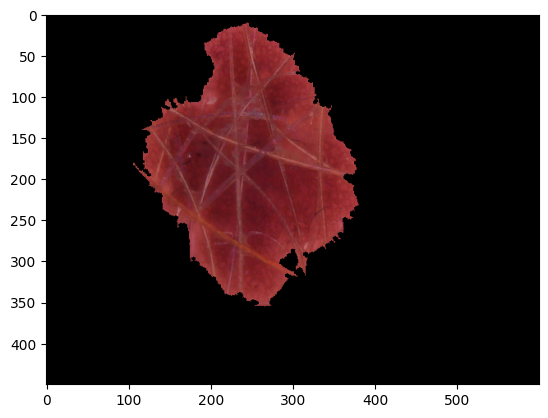

In [5]:
plt.imshow(masked_img)
plt.show()

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model = load_model('7-Class_FinalX.h5')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 133, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 66, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 22, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 11, 64)        0

In [9]:
import numpy as np

In [10]:
img = masked_img
img = cv2.resize(img, (102, 135))
img = (img - np.mean(img)) / np.std(img)
img = np.expand_dims(img, axis=0)

In [5]:
# single_image_path = 'D:\\Skin Cancer Project\\Final Dataset\\Final\\nv\\ISIC_0024659.png'
# img = cv2.imread(single_image_path)
# img = cv2.resize(img, (102, 135))
# img = (img - np.mean(img)) / np.std(img)
# img = np.expand_dims(img, axis=0)

In [11]:
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 1s 564ms/step


In [12]:
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
predicted_class_name = class_names[predicted_class[0]]
print('Predicted class:', predicted_class_name)

Predicted class: nv
